# Movie data analysis

## Data Setup

In [2]:
# import datasets

import pandas as pd

movies = pd.read_csv('./datasets/movie.csv')
ratings = pd.read_csv('./datasets/rating.csv')
links = pd.read_csv('./datasets/link.csv')

In [ ]:
# Checking data samples

print(movies.head())
print(ratings.head())
print(links.head())

# Checking data structure

print(movies.info())
print(ratings.info())
print(links.info())

## Data Processing

In [3]:
# Checking Missing Values
print(movies.isnull().sum())
print(ratings.isnull().sum())
print(links.isnull().sum())

# Removing Missing Values
movies = movies.dropna()
ratings = ratings.dropna()
links = links.dropna()


movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId      0
imdbId       0
tmdbId     252
dtype: int64


In [4]:
# Merging data(movies + ratings)
movie_ratings = pd.merge(ratings, movies, on='movieId')
print(movie_ratings.head())


   userId  movieId  rating            timestamp           title   
0       1        2     3.5  2005-04-02 23:53:47  Jumanji (1995)  \
1       5        2     3.0  1996-12-25 15:26:09  Jumanji (1995)   
2      13        2     3.0  1996-11-27 08:19:02  Jumanji (1995)   
3      29        2     3.0  1996-06-23 20:36:14  Jumanji (1995)   
4      34        2     3.0  1996-10-28 13:29:44  Jumanji (1995)   

                       genres  
0  Adventure|Children|Fantasy  
1  Adventure|Children|Fantasy  
2  Adventure|Children|Fantasy  
3  Adventure|Children|Fantasy  
4  Adventure|Children|Fantasy  


## Data Analysis

In [11]:
# Necessary Module Insatallation

!pip install matplotlib seaborn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 4.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 3.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


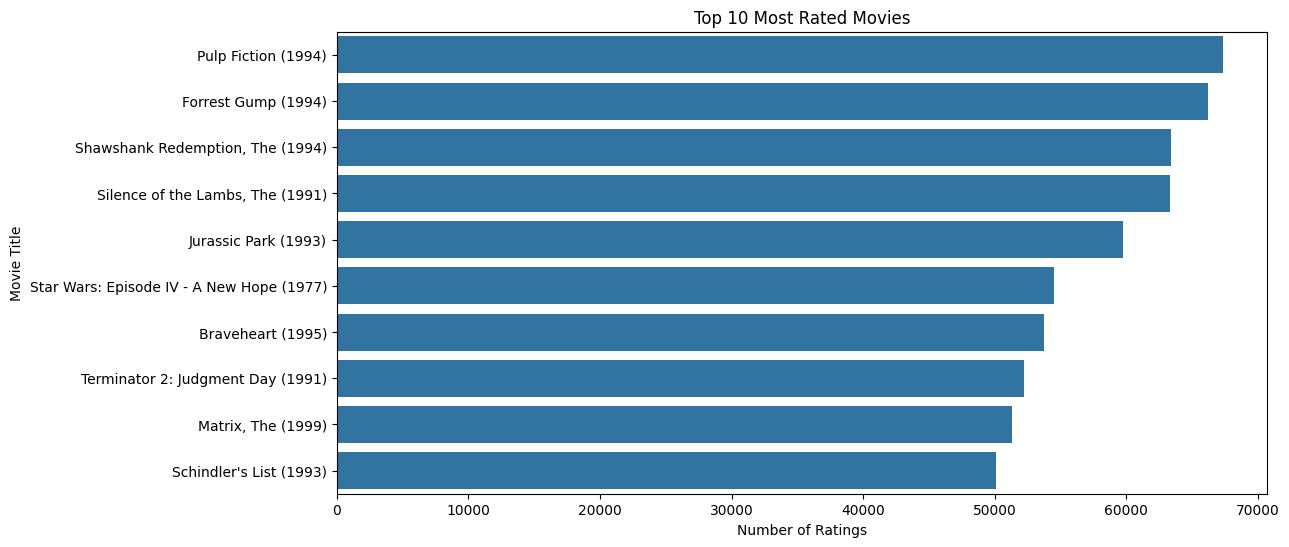

In [10]:
# Caculate the rating for the each movies.

rating_counts = movie_ratings['title'].value_counts().reset_index()
rating_counts.columns = ['title', 'rating_count']


# Visualize top 10 rated movies

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='rating_count', y='title', data=rating_counts.head(10))
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()


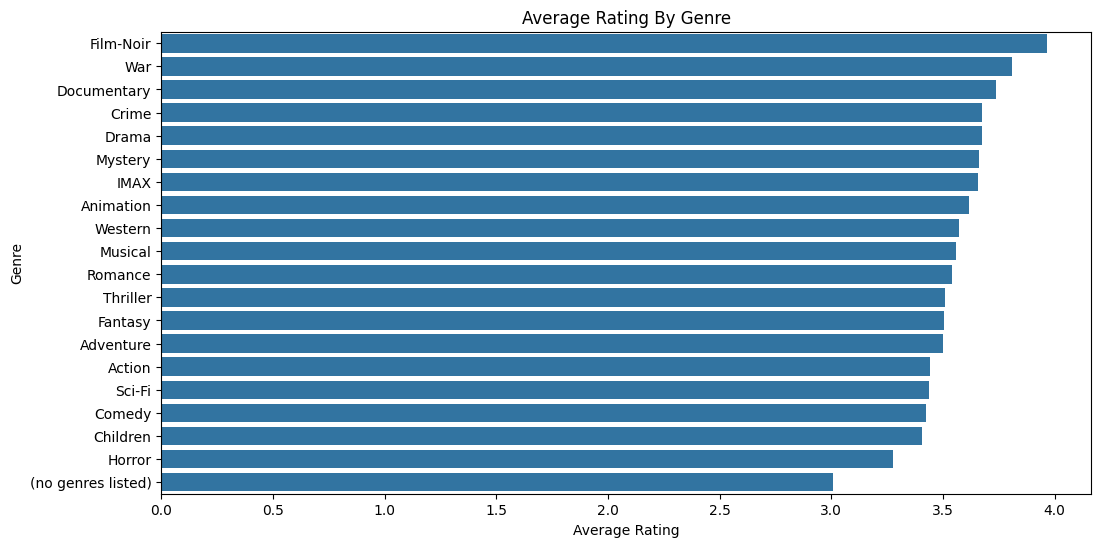

In [12]:
# Analyze Rating by Genres

movie_ratings['genres'] = movie_ratings['genres'].str.split('|')
movie_ratings = movie_ratings.explode('genres') # Expand columns by genres
genre_ratings = movie_ratings.groupby('genres')['rating'].mean().reset_index() # Making a genres / ratings chart

# Visualization of Ratings by Genres

plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='genres', data=genre_ratings.sort_values(by='rating', ascending = False))
plt.title('Average Rating By Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

## Prediction Model 

In [15]:
# Data processing for the prediction model

from sklearn.model_selection import train_test_split

# Set up characteristics and target

X = movie_ratings[['userId', 'movieId']]
y = movie_ratings['rating']

# Split data into train data and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Model Machine Learning
# Base Line Model : User / Movie Rating Mean

user_mean = X_train.join(y_train).groupby('userId')['rating'].mean()
movie_mean = X_train.join(y_train).groupby('movieId')['rating'].mean()
global_mean = y_train.mean()

# Prediction function

def predict(user_id, movie_id):
    if user_id in user_mean and movie_id in movie_mean:
        return (user_mean[user_id] + movie_mean[movie_id]) / 2
    elif user_id in user_mean:
        return user_mean[user_id]
    elif movie_id in movie_mean:
        return movie_mean[movie_id]
    else:
        return global_mean

# perform prediction

y_pred = X_test.apply(lambda x: predict(x['userId'], x['movieId']), axis=1)

In [19]:
# Model Evaluation

from sklearn.metrics import mean_squared_error

# RMSE calculation

rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.9000863348313312


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
